##Dijkstra's algorithm

In [1]:
import numpy as np
import networkx as nx
from itertools import combinations
import matplotlib.pyplot as plt
import heapq


In [2]:
def generate_adjacency_matrix(n):
    """Generates a random adjacency matrix for a directed graph with n vertices."""
    np.random.seed(42)  # For reproducibility
    A = np.random.randint(0, 2, (n, n))  # Random adjacency matrix (0s and 1s)
    np.fill_diagonal(A, 0)  # Remove self-loops

    # Add random weights (1-10) where edges exist
    weights = np.random.randint(1, 11, (n, n))
    A = A * weights
    return A


In [3]:
def dijkstra_all_pairs(A):
    """Dijkstra's algorithm for all-pairs shortest paths."""
    n = len(A)
    d = np.full((n, n), np.inf)  # Distance matrix
    p = np.zeros((n, n), dtype=int)  # Predecessor matrix

    for source in range(n):
        # Initialize distances and predecessors
        dist = [np.inf] * n
        prev = [-1] * n
        dist[source] = 0

        # Priority queue
        heap = []
        heapq.heappush(heap, (0, source))

        while heap:
            current_dist, u = heapq.heappop(heap)

            # Skip if we've already found a better path
            if current_dist > dist[u]:
                continue

            # Explore neighbors
            for v in range(n):
                if A[u, v] > 0:  # There's an edge from u to v
                    alt = dist[u] + A[u, v]
                    if alt < dist[v]:
                        dist[v] = alt
                        prev[v] = u
                        heapq.heappush(heap, (alt, v))

        # Store results for this source
        for v in range(n):
            d[source, v] = dist[v]
            p[source, v] = prev[v]

    return d, p


In [4]:
def reconstruct_path(p, i, j):
    """Reconstructs the shortest path from i to j using predecessor matrix."""
    if p[i, j] == -1 and i != j:
        return []  # No path exists

    path = []
    current = j
    while current != i and current != -1:
        path.append(int(current))
        current = p[i, current]

    if current == -1:  # No path exists
        return []

    path.append(int(i))
    return path[::-1]  # Reverse to get from i to j


In [5]:
def plot_graph(A):
    """Plots the directed graph represented by the adjacency matrix A with edge weights."""
    G = nx.DiGraph(A)
    pos = nx.circular_layout(G)

    # Create edge labels dictionary {(u, v): weight}
    edge_labels = {(i, j): A[i, j] for i in range(len(A)) for j in range(len(A)) if A[i, j] != 0}

    plt.figure(figsize=(8, 6))
    nx.draw(G, pos, with_labels=True, node_color='lightblue',
           node_size=800, font_size=12, font_weight='bold',
           edge_color='gray', arrows=True, arrowstyle='-|>', arrowsize=15)

    # Draw edge labels
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels,
                                font_color='red', font_size=10)

    plt.title("Directed Graph with Edge Weights")
    plt.show()

In [6]:
# Generate graph and run Dijkstra's algorithm
n = 5
A = generate_adjacency_matrix(n)
print("Adjacency Matrix:\n", A)


Adjacency Matrix:
 [[0 2 0 0 0]
 [6 0 0 0 3]
 [0 0 0 0 5]
 [0 7 5 0 0]
 [2 0 9 2 0]]


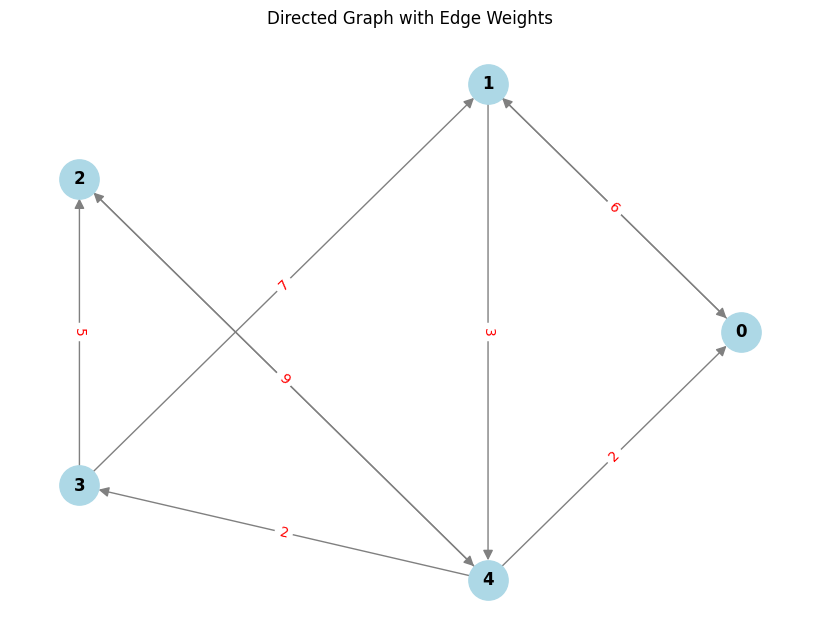

In [7]:
plot_graph(A)

In [8]:

d, p = dijkstra_all_pairs(A)
print("Distance Matrix:\n", d)
print("\nPredecessor Matrix:\n", p)

start, end = 1, 2
path = reconstruct_path(p, start, end)
print(f"\nShortest path from {start} to {end}: {path}")



Distance Matrix:
 [[ 0.  2. 12.  7.  5.]
 [ 5.  0. 10.  5.  3.]
 [ 7.  9.  0.  7.  5.]
 [12.  7.  5.  0. 10.]
 [ 2.  4.  7.  2.  0.]]

Predecessor Matrix:
 [[-1  0  3  4  1]
 [ 4 -1  3  4  1]
 [ 4  0 -1  4  2]
 [ 4  3  3 -1  2]
 [ 4  0  3  4 -1]]

Shortest path from 1 to 2: [1, 4, 3, 2]


In [10]:
# Generate graph and run Dijkstra's algorithm
n = 20
A = generate_adjacency_matrix(n)
print("Adjacency Matrix:\n", A)


Adjacency Matrix:
 [[ 0  4  0  0  0  6  0  0  0  9  0  0  0  0  2  0  3  9  4  0]
 [ 4  0  5  4  8  8  7  3  1  1  0  0  7  6  6  0  3  0  0  0]
 [ 0  0  0  5  3  4  3  0  1  5  0  3  0  5  0  1  5  0  0  0]
 [ 0  0  0  0  0  9 10  0 10  3  8  8  0  6  0  2 10  2  0  1]
 [ 0  1  0  6  0  0  7  0  3  2  9  8 10  7  9  4  4  1  8  0]
 [ 0  2  2  7  6  0  9 10  6  0 10  0  1  4  0  6  0  5  1  0]
 [ 5  0  7  0  0  4  0  0  8  4  2  0  0  0  0  0  0  0  0  0]
 [10  0  7  9  5  0  0  0  0  2  0  0  0  0  0  7  0  6  0  3]
 [ 0  0  5  6  9  0  1  0  0 10 10  0  0  4  1  5  0  0  0  0]
 [ 0  0  2  0  0  0  3  0  0  0  0  0  0  0  0  1  4  8  0  0]
 [ 0  1  0  0  3  0  1  8 10  0  0  0  0  0  0  0  8  0 10  0]
 [ 0  0  9  7  4 10  0  2  0  0  9  0  9  4 10  5  9  8  0  1]
 [ 3  0  2  0  0  8  0  0  0  0  7  0  0  0  0  0  0  9  6  0]
 [ 0  4  0  0  0  7  4  3  0  0  5  3  9  0  0  4  0  7  0  7]
 [ 5 10 10  0 10  0  0  0  0  9  0  0  0  6  0  8 10  0  0 10]
 [ 0  0  0  6  3  0  1  6  4  1  7  

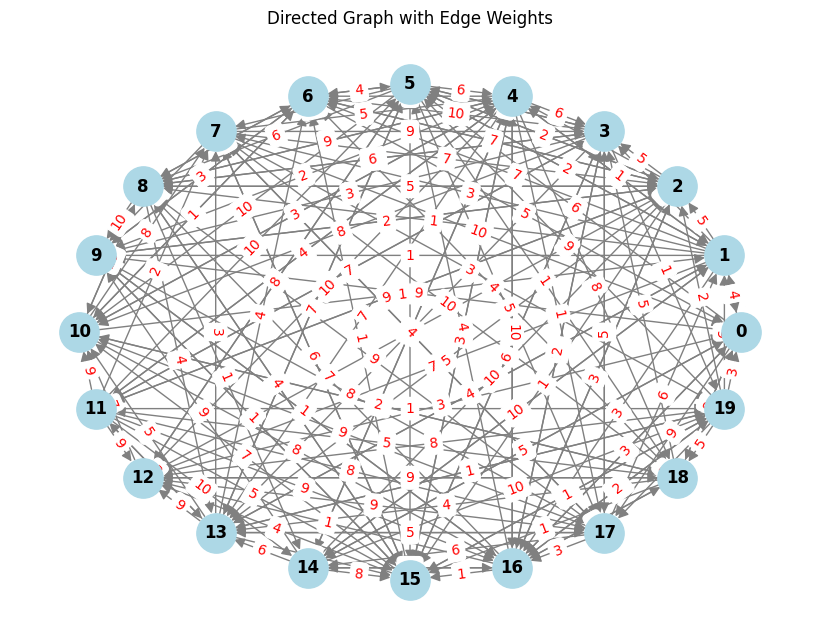

In [11]:
plot_graph(A)

In [13]:

d, p = dijkstra_all_pairs(A)
print("Distance Matrix:\n", d)
print("\nPredecessor Matrix:\n", p)

start, end = 5, 1
path = reconstruct_path(p, start, end)
print(f"\nShortest path from {start} to {end}: {path}")



Distance Matrix:
 [[ 0.  4.  6.  5.  7.  6.  5.  7.  5.  4.  6.  9.  4.  7.  2.  4.  3.  7.
   4.  6.]
 [ 4.  0.  3.  4.  5.  6.  2.  3.  1.  1.  4.  6.  4.  5.  2.  2.  3.  6.
   7.  5.]
 [ 7.  4.  0.  5.  3.  4.  2.  5.  1.  2.  4.  3.  5.  5.  2.  1.  5.  4.
   5.  4.]
 [ 4.  6.  3.  0.  5.  7.  3.  5.  4.  3.  5.  5.  4.  2.  5.  2.  3.  2.
   6.  1.]
 [ 5.  1.  4.  5.  0.  7.  3.  4.  2.  2.  5.  7.  5.  6.  3.  3.  4.  1.
   8.  6.]
 [ 4.  2.  2.  6.  5.  0.  3.  5.  3.  3.  3.  5.  1.  4.  4.  2.  5.  5.
   1.  6.]
 [ 5.  3.  6.  7.  5.  4.  0.  6.  4.  4.  2.  9.  5.  8.  5.  5.  6.  6.
   5.  8.]
 [ 6.  6.  4.  7.  5.  8.  4.  0.  5.  2.  6.  7.  6.  4.  6.  3.  5.  4.
   8.  3.]
 [ 6.  4.  5.  6.  6.  5.  1.  7.  0.  5.  3.  7.  6.  4.  1.  5.  7.  7.
   6.  7.]
 [ 7.  5.  2.  6.  4.  6.  2.  7.  3.  0.  4.  5.  5.  7.  4.  1.  4.  5.
   7.  6.]
 [ 5.  1.  4.  5.  3.  5.  1.  4.  2.  2.  0.  7.  5.  6.  3.  3.  4.  4.
   6.  6.]
 [ 4.  5.  3.  5.  4.  7.  3.  2.  4.  3.  5.  